# HW2

## Chapter 3

6. 다음 정규식과 일치하는 문자열을 설명하십시오.

a. [a-zA-Z]+ : 알파벳 1개 이상의 단어

b. [A-Z][a-z]* : 대문자 1개로 시작하고 소문자 0개 이상의 단어

c. p[aeiou]{,2}t : p로 시작하고, 중간에 소문자 모음 최대 2개, t로 끝나는 단어

d. \d+(.\d+)? : 0 이상의 유리수

e. ([^aeiou][aeiou][^aeiou])* : [소문자 모음을 제외한 글자-소문자 모음-소문자 모음을 제외한 글자]
조합으로 0개 이상인 단어

f. \w+|[^\w\s]+ : 공백을 제외하고 글자 1개 이상의 단어

In [ ]:
# nltk.re_show를 사용하여 답변을 테스트하십시오.
import nltk, re
nltk.re_show(r'[a-zA-Z]+', 'Regular expressions 1234 a1B')

In [ ]:
nltk.re_show(r'[A-Z][a-z]*', 'Regular expressions 1234 a1B')

In [ ]:
nltk.re_show(r'\d+(.\d+)?', '0.1234 22 -3 -1.12 1/3 -5/1')

In [ ]:
nltk.re_show(r'p[aeiou]{,2}t', 'pt pait paiut pAt')

In [ ]:
nltk.re_show(r'([^aeiou][aeiou][^aeiou])*', "bab babbab bbb")

In [ ]:
nltk.re_show(r'\w+|[^\w\s]', "Regular expressions 1234 a1B_")

21. URL을 인수로 사용하고 해당 웹 페이지에서 발생하는 알 수 없는 단어 목록을 반환하는 함수 unknown()을 작성합니다. 이렇게 하려면 소문자로 구성된 모든 하위 문자열을 추출하고(re.findall() 사용) WordsCorpus(nltk.corpus.words)에서 발생하는 항목을 이 집합에서 제거합니다. 이 단어들을 수동으로 분류하고 결과에 대해 논의해 보십시오.

In [ ]:
import nltk
from nltk.corpus import words
from nltk import word_tokenize
from urllib import request
import re
nltk.download('words')
def unknown(url):
  response = request.urlopen(url)
  raw = response.read().decode('utf8')
  lowercase_letters = re.findall(r'[a-z]+', raw)
  wordlist = set(words.words())
  unknowns = [word for word in lowercase_letters if word not in wordlist]
  return unknowns
url = 'http://www.gutenberg.org/files/2554/2554-0.txt'
print(unknown(url))

30. Porter Stemmer를 사용하여 토큰화된 텍스트를 정규화하고 각각의 Stemmer를 호출합니다. Lancaster Stemmer도 똑같이 해보고 차이점이 있는지 확인해보세요.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
raw = "DENNIS: Listen, strange women lying in ponds distributing swords is no basis for a system Supreme executive power derives from a mandate from the masses, not from some farcical aquatic cere"
tokens = word_tokenize(raw)
print(tokens)
print([nltk.PorterStemmer().stem(t) for t in tokens])
print([nltk.LancasterStemmer().stem(t) for t in tokens])

## Chapter 5

15. Brown Corpus 를 처리하기 위한 프로그램을 작성하고 다음 질문에 대한 답을 찾으십시오.

In [ ]:
# 1.어떤 명사가 단수형보다 복수형이 더 일반적인가요? (-s 접미사로 형성된 복수형만 고려하십시오.)
import nltk
nltk.download('brown')
# create set of all singular nouns in the Brown Corpus
sing_nouns = set(word.lower() for (word, tag) in nltk.corpus.brown.tagged_words() if tag == 'NN')
# create set of all plural nouns in the Brown Corpus
plur_nouns = set([word.lower() for (word, tag) in nltk.corpus.brown.tagged_words() if tag == 'NNS'])
# make a list of words that have regular plurals represented in plur_nouns
cands = [n for n in sing_nouns if n + "s" in plur_nouns]
# get FreqDist for singular nouns
snfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() if word in sing_nouns)
# get FreqDist for plural nouns
pnfd = nltk.FreqDist(word.lower() for (word, _) in nltk.corpus.brown.tagged_words() if word in plur_nouns)
# find out which words are more common in the plural form
more_common_plur = [(pnfd[c + 's'], c + 's', snfd[c], c) for c in cands if pnfd[c + 's'] > snfd[c]]
sorted(more_common_plur, reverse = True)[:20]

In [ ]:
# 2.구별되는 태그의 수가 가장 많은 단어는 무엇입니까? 그것들은 무엇이며, 무엇을 대표하는가?
import nltk
from nltk.corpus import brown
from collections import defaultdict
nltk.download('brown')
nltk.download('tagsets')
# create a ConditionalFreqDist with all the words in the corpus,
# with counts of each of their tags
dt = nltk.ConditionalFreqDist(brown.tagged_words())
# create a dictionary where the keys will be the number of distinct tags
tags = defaultdict(list)
for w in set(brown.words()):
    tags[len(dt[w])].append(w)
# word with the most tags
print(max(tags))
print(tags[12])
for tag in dt['that']:
    nltk.help.brown_tagset(tag)

In [ ]:
# 3. 태그를 빈도가 낮은 순서대로 나열합니다. 가장 빈번한 20개의 태그는 무엇을 나타냅니까?
tags = [tags for _, tags in brown.tagged_words()]
ft = nltk.FreqDist(tags)
print(ft.most_common(100), end = '')
for tag, _ in ft.most_common(20):
    nltk.help.brown_tagset(tag)

In [ ]:
# 4. 명사 다음에 가장 흔하게 발견되는 태그는 무엇인가? 이 태그들은 무엇을 나타냅니까?
wtp = nltk.bigrams(brown.tagged_words())
np = [a[1] for (a, b) in wtp if b[1].startswith('NN')]
fd = nltk.FreqDist(np)
prec_tags = [tag for (tag, _) in fd.most_common(20)]
print(prec_tags, end = '')
for tag in prec_tags:
    nltk.help.brown_tagset(tag)

20. Brown Corpus 에서 태그에 따라 특정 단어와 구문을 검색하는 코드를 작성합니다.
다음 질문에 답합니다.

In [ ]:
# a. MD로 태그된 고유 단어의 알파벳 순으로 정렬된 목록을 생성합니다.
print(sorted(set([w.lower() for w, t in brown.tagged_words() if t == 'MD'])), end = '')

In [ ]:
# b. 복수 명사 또는 3인칭 단수 동사(예:deals, flies)가 될 수 있는 단어를 식별합니다.
cfd = nltk.ConditionalFreqDist(brown.tagged_words())
NNS_VBZ = set([w for w in set(w.lower() for w, t in brown.tagged_words()) if 'NNS' in cfd[w] and 'VBZ'])
print(NNS_VBZ, end = '')

In [ ]:
# c. IN + DET + NN 형식의 세 단어 전치사 구문을 식별합니다(예:in the lab)
three_word_pp = [(w1, w2, w3) for sent in brown.tagged_sents() for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent) if (t1=='IN' and t2 == 'DT' and t3.startswith('NN'))]
print(three_word_pp[:50], end = '')

In [ ]:
# d. 남성 대명사와 여성 대명사의 비율은 어떻게 되나요?
print([set(w.lower() for w,t in brown.tagged_words() if t.startswith('PP'))])
m = ["he'd",  "he'll",  "he's",  "'im",  'he',  'him',  'himself',  'himselfe',  'his',  'hisself', 'hym', 'hys', "h'all"]
f = ["she'd",  "she'll",  "she's",  'her',  'hers',  'herself',  'hir',  'she']
m_values = sum([sum(cfd[mp].values()) for mp in m])
f_values = sum([sum(cfd[fp].values()) for fp in f])
print(m_values/f_values)

# HW3

##Chapter 7

1. IOB 형식은 태그가 지정된 토큰을 I, O 및 B로 분류합니다. 왜 세 개의 태그가 필요한가요? I 태그와 O 태그만 사용하면 어떤 문제가 발생할까요?

I 태그와 O 태그만 사용할 경우 발생할 수 있는 한 가지 문제는 다음 작업이 불가능하다는 것입니다.
하나의 긴 덩어리를 서로 바로 인접한 두 개의 작은 덩어리와 구별한다.
경계를 식별하는 태그가 없을 것이기 때문입니다.


5. 동명사를 포함하는 명사구를 포함하는 태그 패턴을 작성합니다(예:"the/DT receiving/VBG
end/NN", "assistant/NN managing/VBG editor/NN"). 이 패턴들을 문법에 추가하세요.
라인. 당신 자신의 장치의 태그가 달린 문장을 사용하여 당신의 작업을 테스트하세요.


In [ ]:
import nltk
grammar = """
    NP: {<DT>?<VBG>*<NN>}
"""
cp = nltk.RegexpParser(grammar)
sentences = [[("the", "DT"), ("receiving", "VBG"), ("end", "NN")], 
             [("assistant", "NN"),  ("managing", "VBG"),  ("editor", "NN")]]
for sent in sentences:
    print(cp.parse(sent))

(S (NP the/DT receiving/VBG end/NN))
(S (NP assistant/NN) (NP managing/VBG editor/NN))


다음과 같은 성능 메트릭의 의미를 설명합니다.
Accuracy, Precision, Recall, F-measure which are
generated by "accuracy" function

- Accuracy : 올바르게 예측된 데이터의 수를 전체 데이터의 수로 나눈 값
- Precision : 모델이 True로 예측한 데이터 중 실제로 True인 데이터 수
- Recall : 실제로 True인 데이터를 모델이 True라고 인식한 데이터 수
- F-measure : precision 과 recall의 조화평균

"UnigramChunker"와 "BigramChunker"를 조사하고, 왜 "BigramChunker" 가 더 좋은 성능을 내는지 말하세요.

- n-gram은 n개의 연속적인 단어 나열을 의미한다. n개의 단어 단위로 끊어 하나의 토큰으로 간주한다

유니그램(unigram) : n이 1일 때, 1개의 단어를 하나의 토큰으로 간주한다.

바이그램(bigram) : n이 2일 때, 2개의 단어를 하나의 토큰으로 간주한다.

문장의 맥락을 파악하기 위해서는 1개의 단어를 사용하는것 보다 2개의 단어를 함께 사용하는게 더 좋다.


## Chapter 8

3. Kim arrived or Dana left and everyone cheered 문장을 생각해보라. 괄호로 묶은 양식을 작성하여 및 또는 의 상대적 범위를 표시합니다. 이 두 해석에 해당하는 트리 구조를 생성합니다.

In [ ]:
pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.2 MB/s 


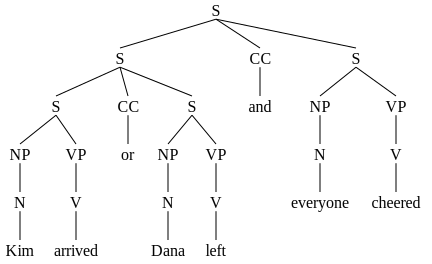

In [ ]:
import nltk
from nltk import Tree
string = '(S (S (S (NP (N Kim)) (VP (V arrived))) (CC or) (S (NP (N Dana)) (VP (V left)))) (CC and) (S (NP (N everyone)) (VP (V cheered))))'
nltk.Tree.fromstring(string)

5. a) parse trees를 수동으로 작성해보자. Write code to produce two trees, one for each reading of the phrase old men and women

(S (JJ old) (NP (N men) (CC and) (N women)))
(S (NP (JJ old) (N men)) (CC and) (NP (N women)))


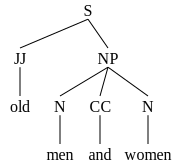

In [ ]:
grammar = nltk.CFG.fromstring("""
S -> NP CC NP | JJ NP
NP -> N | JJ N | N CC N
N -> 'men' | 'women'
JJ -> 'old'
CC -> 'and'
""")
sent = ['old', 'men', 'and', 'women']
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
    print(tree)
trees = []
for tree in parser.parse(sent):
    trees.append(str(tree))
nltk.Tree.fromstring(trees[0])

# Week 9

In [ ]:
import nltk
sentence = [("the","DT"),("IittIe","JJ"), ("yelIow","JJ"), ("dog","NN"), ("barked","VBD"), ("at","IN"), ("the","DT"), ("cat", "NN")]
grammar = "NP : {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result= cp.parse(sentence)
print(result)

(S
  (NP the/DT IittIe/JJ yelIow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [ ]:
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}     # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                  # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let","VBD"), ("down","RP"),
            ("her","PP$"), ("long","JJ"), ("goIden","JJ"), ("hair","NN")]
print(cp.parse(sentence))

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ goIden/JJ hair/NN))


In [ ]:
nouns = [("money","NN"), ("market","NN"), ("fund","NN") ]
grammar = "NP: {<NN><NN>}   # Chunk two consecutive nouns"
cp = nltk.RegexpParser(grammar)
print(cp.parse(nouns))

(S (NP money/NN market/NN) fund/NN)


In [ ]:
grammar = r"""
  NP:
    {<.*>+}             # Chunk everything
    }<VBD|IN>+{         # Chink sequences of VBD and IN
"""
sentence= [("the","DT"), ("little","JJ"), ("yellow","JJ"),
           ("dog","NN"), ("barked","VBD"), ("at","IN"), ("the","DT"), ("cat","NN")]
cp = nltk.RegexpParser(grammar)
print(cp.parse(sentence))

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [ ]:
from nltk.corpus import conll2000
print(conll2000.chunked_sents('train.txt')[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


In [ ]:
print(conll2000.chunked_sents('train.txt', chunk_types= ['NP'])[99])

(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  told/VBD
  (NP his/PRP$ story/NN)
  ./.)


In [ ]:
from nltk.corpus import conll2000
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [ ]:
grammar= r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(cp.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [ ]:
class UnigramChunker(nltk.ChunkParserI):
  def __init__(self, train_sents ):
    train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                  for sent in train_sents]
    self.tagger = nltk.UnigramTagger(train_data)

  def parse(self, sentence):
    pos_tags = [pos for (word,pos) in sentence]
    tagged_pos_tags = self.tagger.tag(pos_tags)
    chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
    conlltags= [(word, pos, chunktag) for ((word,pos),chunktag)
                in zip(sentence, chunktags)]
    return nltk.chunk.conlltags2tree(conlltags)

In [ ]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


# Week 10

In [ ]:
nltk.download('conll2000')
from nltk.corpus import conll2000
print(conll2000.chunked_sents('train.txt')[99])

(S
  (PP Over/IN)
  (NP a/DT cup/NN)
  (PP of/IN)
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  (VP told/VBD)
  (NP his/PRP$ story/NN)
  ./.)


[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


In [ ]:
print(conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99])

(S
  Over/IN
  (NP a/DT cup/NN)
  of/IN
  (NP coffee/NN)
  ,/,
  (NP Mr./NNP Stone/NNP)
  told/VBD
  (NP his/PRP$ story/NN)
  ./.)


In [ ]:
from nltk.corpus import conll2000
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [ ]:
grammar= r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(cp.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [ ]:
class UnigramChunker(nltk.ChunkParserI):
  def __init__(self, train_sents ):
    train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                  for sent in train_sents]
    self.tagger = nltk.UnigramTagger(train_data)

  def parse(self, sentence):
    pos_tags = [pos for (word,pos) in sentence]
    tagged_pos_tags = self.tagger.tag(pos_tags)
    chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
    conlltags= [(word, pos, chunktag) for ((word,pos),chunktag)
                in zip(sentence, chunktags)]
    return nltk.chunk.conlltags2tree(conlltags)

In [ ]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [ ]:
grammar = r"""
  NP: {<DT|JJ|NN.*>+}             # Chunk sequences of DT, JJ, NN
  PP: {<IN><NP>}                  # Chunk prepositions followed by NP
  VP: {<VB.*><NP|PP|CLAUSE>+$}    # Chunk verbs and their arguments
  CLAUSE: {<NP><VP>}              # Chunk NP, VP
  """
cp = nltk.RegexpParser(grammar)
sentence = [("Mary","NN"), ("saw","VBD"), ("the","DT"), ("cat","NN"),
            ("sit","VB"), ("on","IN"), ("the","DT"), ("mat", "NN")]
print(cp.parse(sentence))

(S
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [ ]:
sentence = [("John","NNP"), ("thinks","VBZ"), ("Mary","NN"),
            ("saw","VBD"), ("the","DT"), ("cat","NN"), ("sit","VB"),
            ("on","IN"), ("the","DT"), ("mat","NN")]
print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [ ]:
cp = nltk.RegexpParser(grammar, loop=2)
print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (CLAUSE
    (NP Mary/NN)
    (VP
      saw/VBD
      (CLAUSE
        (NP the/DT cat/NN)
        (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))))


In [ ]:
nltk.download('treebank')
nltk.download('maxent_ne_chunker')
nltk.download('words')
sent = nltk.corpus.treebank.tagged_sents()[22]
print(nltk.ne_chunk(sent, binary=True))

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...


(S
  The/DT
  (NE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (NE Brooke/NNP)
  T./NNP
  Mossman/NNP
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (NE University/NNP)
  of/IN
  (NE Vermont/NNP College/NNP)
  of/IN
  (NE Medicine/NNP)
  ./.)


[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
print(nltk.ne_chunk(sent))

(S
  The/DT
  (GPE U.S./NNP)
  is/VBZ
  one/CD
  of/IN
  the/DT
  few/JJ
  industrialized/VBN
  nations/NNS
  that/WDT
  *T*-7/-NONE-
  does/VBZ
  n't/RB
  have/VB
  a/DT
  higher/JJR
  standard/NN
  of/IN
  regulation/NN
  for/IN
  the/DT
  smooth/JJ
  ,/,
  needle-like/JJ
  fibers/NNS
  such/JJ
  as/IN
  crocidolite/NN
  that/WDT
  *T*-1/-NONE-
  are/VBP
  classified/VBN
  *-5/-NONE-
  as/IN
  amphobiles/NNS
  ,/,
  according/VBG
  to/TO
  (PERSON Brooke/NNP T./NNP Mossman/NNP)
  ,/,
  a/DT
  professor/NN
  of/IN
  pathlogy/NN
  at/IN
  the/DT
  (ORGANIZATION University/NNP)
  of/IN
  (PERSON Vermont/NNP College/NNP)
  of/IN
  (GPE Medicine/NNP)
  ./.)


In [ ]:
import nltk
nltk.download ('ieer')
import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
  for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,
                                   corpus='ieer' , pattern = IN):
    print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


[nltk_data] Downloading package ieer to /root/nltk_data...
[nltk_data]   Package ieer is already up-to-date!


# Week 11

In [ ]:
import nltk
groucho_grammar = nltk.CFG.fromstring ("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser= nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
  print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [ ]:
import nltk
grammar1 = nltk.CFG.fromstring ("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
  print(tree)

(S (NP Mary) (VP (V saw) (NP Bob)))


# Week 12

In [ ]:
import nltk
grammar1 = nltk.CFG.fromstring ("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
  print(tree)

(S (NP Mary) (VP (V saw) (NP Bob)))


In [ ]:
sr_parser = nltk.ShiftReduceParser(grammar1)
sent= 'Mary saw a dog' .split()
for tree in sr_parser.parse(sent):
  print(tree)

(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


In [ ]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring ("""
'shot' -> 'I' | 'elephant' | 'in'
'elephant' -> 'an' | 'in'
'in' -> 'pajamas'
'pajamas' -> 'my'
""" )
print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


In [ ]:
pdp = nltk.ProjectiveDependencyParser (groucho_dep_grammar)
sent= 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees :
  print(tree)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


# Week 13

# Week 14